# FINAL PROJECT- ML model Subscription-Prediction 

- In this Project, we are going to perform a full supervised ML model on a "Bank-Marketing" dataset. 
 This dataset is originally from the [**UCI machine learning repository**](https://archive.ics.uci.edu/dataset/222/bank+marketing). The objective of the dataset is to whether a client will subscribe to a term deposit after market campaign(using or more phone calls to customer)
based on certain diagnostic measurements included in the dataset. 

# Part I: EDA & Data Cleaning/Polishing

In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('C:/Users/simon/Final-Project-LHL/bank-full.csv')
df.head(100)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
96,55,blue-collar,married,secondary,no,383,no,no,unknown,5,may,287,1,-1,0,unknown,no
97,60,retired,married,tertiary,no,81,yes,no,unknown,5,may,101,1,-1,0,unknown,no
98,39,technician,married,secondary,no,0,yes,no,unknown,5,may,203,1,-1,0,unknown,no


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [37]:
# Permanently remove the poutcome column as most of its value is "unknown"
df.drop(columns=['poutcome'], inplace= True)
df



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no


In [38]:
# Replace name of target variable y with outcome to be Explanatory
df.rename(columns={'y': 'outcome'}, inplace=True)


In [39]:
# Drop the rows that have the label "unknown" in both the job & education columns:
df.drop(df[(df['job'] == 'unknown') | (df['education'] == 'unknown')].index, inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,outcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no


In [40]:

# Take the numerical variables to check the dataset distribution
num_feat = df[['age','balance', 'duration', 'campaign','pdays','previous','outcome']]


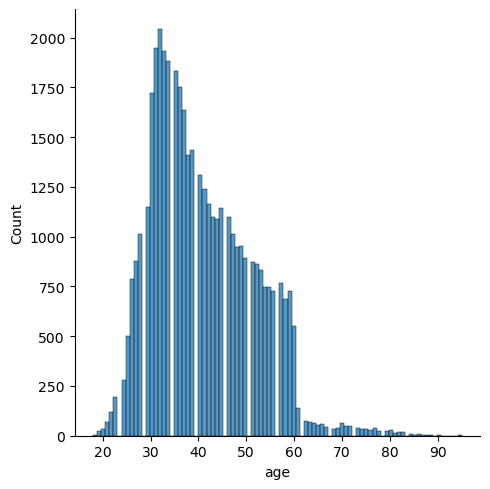

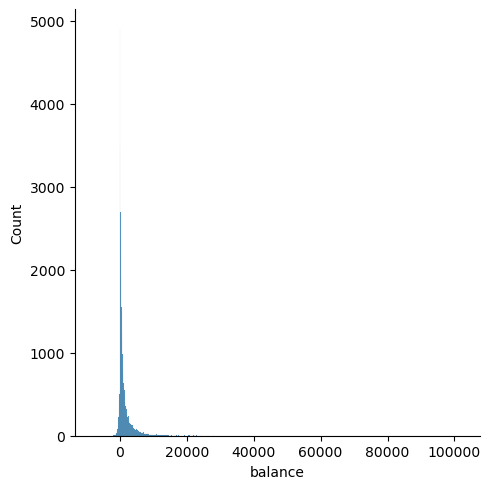

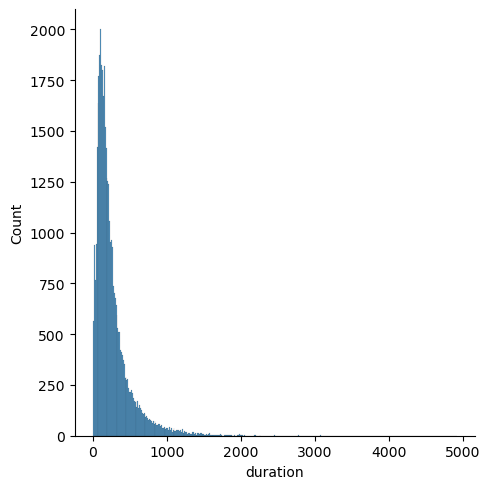

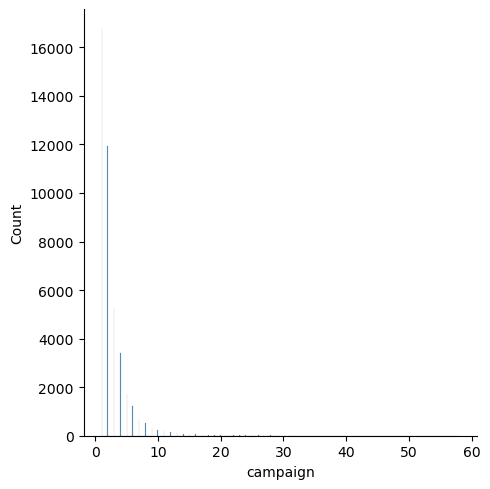

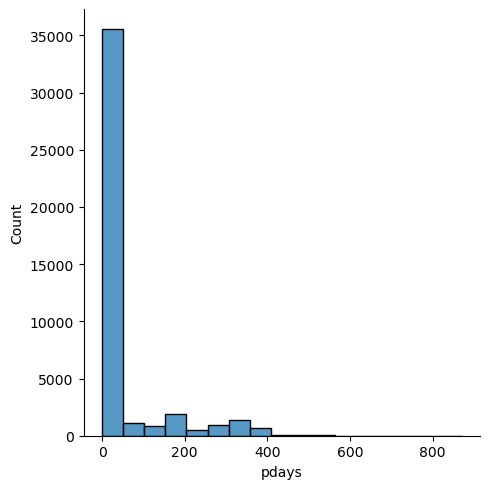

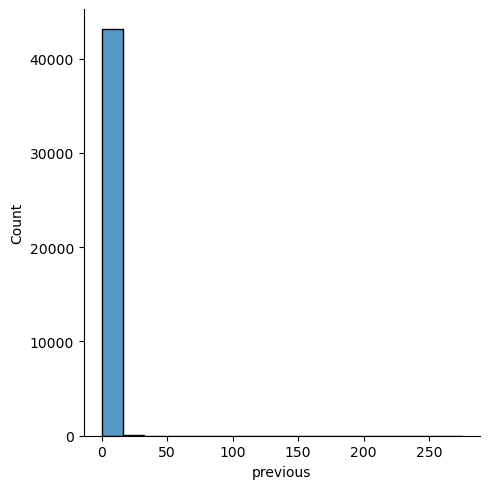

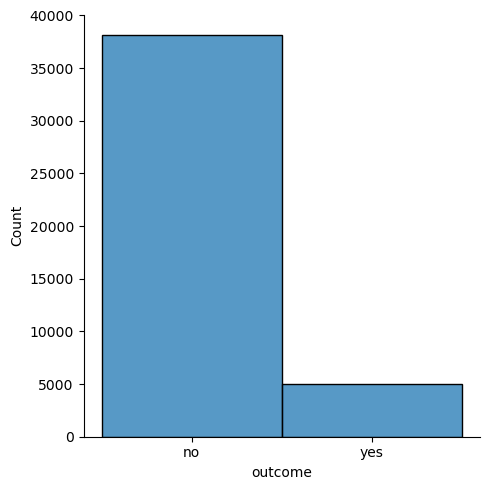

In [41]:
for column in num_feat:
    sns.displot(num_feat[column])

- All the above numerical features except `**age**` are skewed and neeeded to be normalized using logarithmic transformation:

In [42]:
#Changing the binary outcome column in to numeric values of 1 and 0 :
num_feat.loc[:, 'outcome'] = num_feat['outcome'].map({'yes': 1, 'no': 0})
num_feat

,age,balance,duration,campaign,pdays,previous,outcome
0,58,2143,261,1,-1,0,0
1,44,29,151,1,-1,0,0
2,33,2,76,1,-1,0,0
5,35,231,139,1,-1,0,0
6,28,447,217,1,-1,0,0
...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,1
45207,71,1729,456,2,-1,0,1
45208,72,5715,1127,5,184,3,1
45209,57,668,508,4,-1,0,0


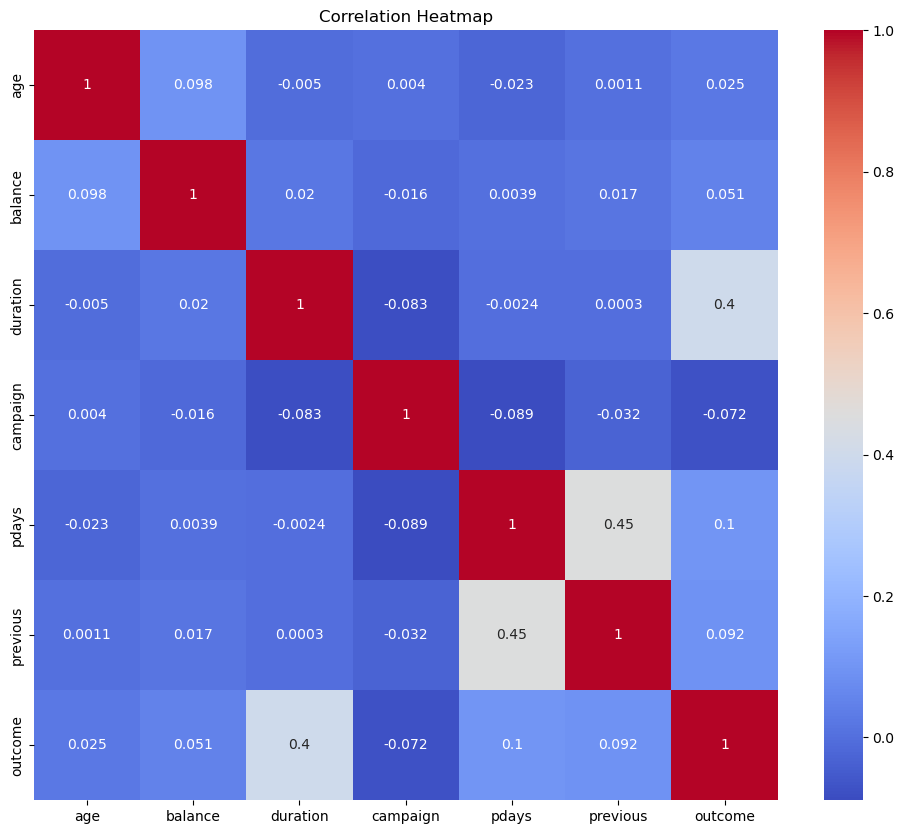

In [43]:
# Using a heatmap to observe the correlations between various predictor variables and also predictor & outcome.
corr_matrix = num_feat.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

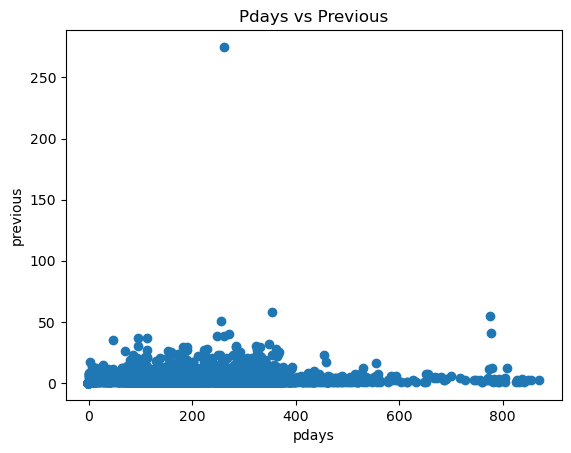

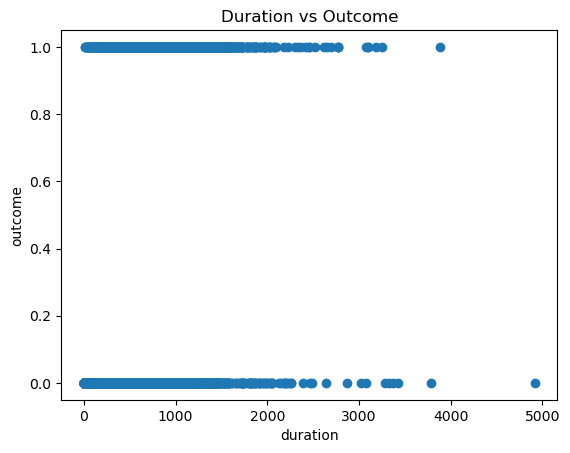

In [44]:
# Scatter plot between pdays and previous
plt.scatter(num_feat['pdays'], num_feat['previous'])
plt.xlabel('pdays')
plt.ylabel('previous')
plt.title('Pdays vs Previous')
plt.show()

# Scatter plot between Milk and Detergents_Paper
plt.scatter(num_feat['duration'], num_feat['outcome'])
plt.xlabel('duration')
plt.ylabel('outcome')
plt.title('Duration vs Outcome')
plt.show()

In [45]:
# Check Class imbalance in the outcome column:
value_counts = num_feat['outcome'].value_counts()
print(value_counts)

outcome
0    38172
1     5021
Name: count, dtype: int64


- Noticed class imbalance that can potentially lead our model to predict in favour one over the other. Our outcome columns has 88.38% (labeled as 0) and 11.62% ( labled as 1).

# PART II: Preprocessing & Feature Engineering

####  Scaling the numerical features

In [51]:
num_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       43193 non-null  int64 
 1   balance   43193 non-null  int64 
 2   duration  43193 non-null  int64 
 3   campaign  43193 non-null  int64 
 4   pdays     43193 non-null  int64 
 5   previous  43193 non-null  int64 
 6   outcome   43193 non-null  object
dtypes: int64(6), object(1)
memory usage: 3.6+ MB


In [46]:
# Scaling those numerical columns with various ranges of continuous data values to avoid dominance:
# from sklearn.preprocessing import MinMaxScaler
# outcome_column = num_feat['outcome']  # separate outcome column as it is binary 
# num_sc = num_feat.drop(columns=['outcome'])

# #Scaling using MinMaxScaler:
# scaler = MinMaxScaler()
# scaled_num_feat = scaler.fit_transform(num_sc)

# scaled_df = pd.DataFrame(scaled_num_feat, columns=['Age','balance','duration','campaigns','pdays','previous'])
# scaled_df
from sklearn.preprocessing import StandardScaler

# Assuming you already have a DataFrame called 'num_feat'
# with columns 'Age', 'balance', 'duration', 'campaigns', 'pdays', 'previous', and 'outcome'

# Separate outcome column as it is binary
outcome_column = num_feat['outcome']
num_sc = num_feat.drop(columns=['outcome'])

# Standardization using StandardScaler
scaler = StandardScaler()
scaled_num_feat = scaler.fit_transform(num_sc)

# Create a new DataFrame with the standardized values
scaled_df = pd.DataFrame(scaled_num_feat, columns=['Age', 'balance', 'duration', 'campaigns', 'pdays', 'previous'])

# The 'scaled_df' DataFrame contains the standardized values of your numerical features
print(scaled_df)



            Age   balance  duration  campaigns     pdays  previous
0      1.639561  0.259354  0.010368  -0.573827 -0.412311 -0.250730
1      0.307816 -0.435568 -0.415726  -0.573827 -0.412311 -0.250730
2     -0.738556 -0.444443 -0.706245  -0.573827 -0.412311 -0.250730
3     -0.548306 -0.369166 -0.462209  -0.573827 -0.412311 -0.250730
4     -1.214179 -0.298161 -0.160070  -0.573827 -0.412311 -0.250730
...         ...       ...       ...        ...       ...       ...
43188  0.973688 -0.173904  2.783852   0.078925 -0.412311 -0.250730
43189  2.876182  0.123262  0.765716  -0.247451 -0.412311 -0.250730
43190  2.971307  1.433555  3.364890   0.731677  1.429961  1.035364
43191  1.544437 -0.225513  0.967143   0.405301 -0.412311 -0.250730
43192 -0.358057  0.531537  0.397726  -0.247451  1.469794  4.464947

[43193 rows x 6 columns]


#### Normalizing distribution in columns with skewed distribution

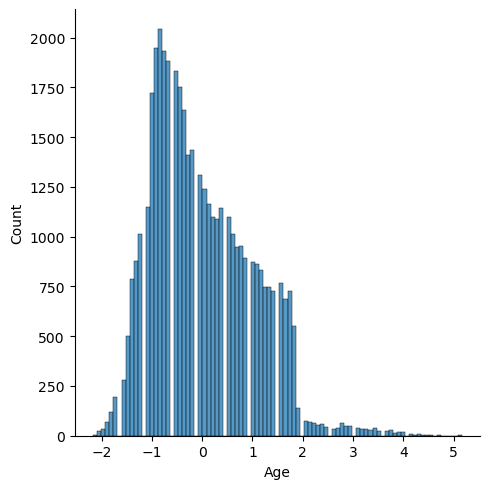

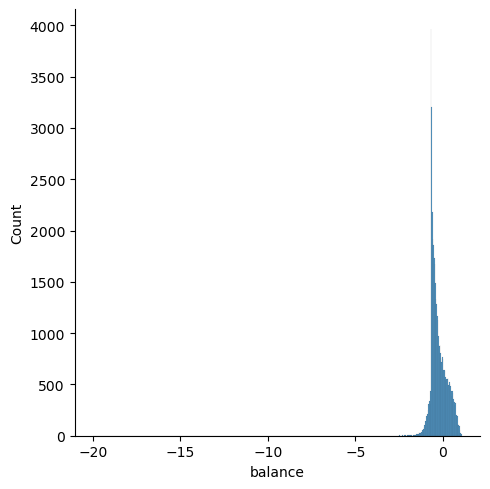

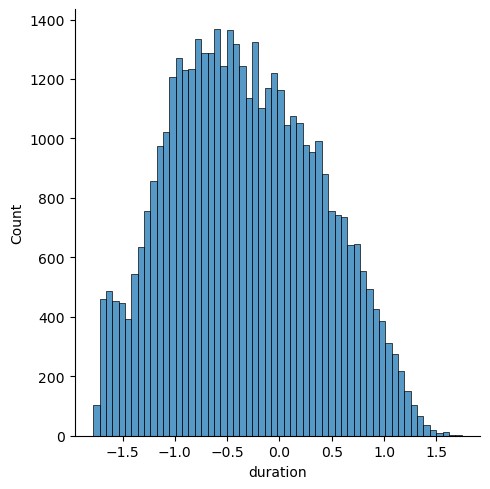

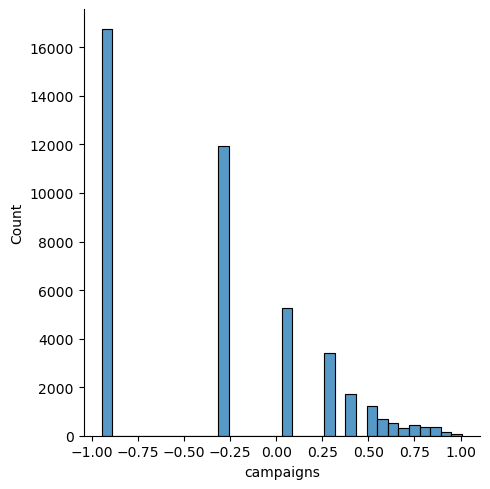

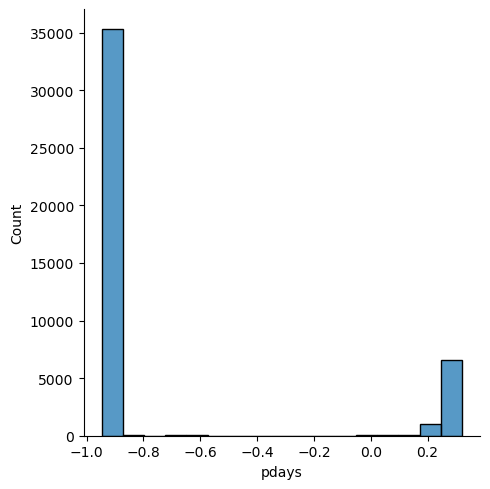

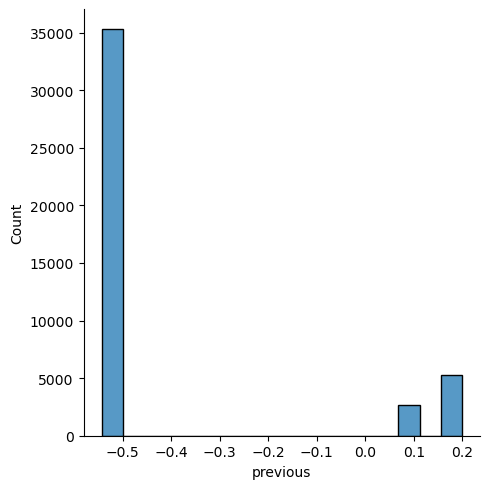

In [47]:

# from scipy.stats import yeojohnson
# Age_column = scaled_df['Age'] # Separate age column as it is already normally distribute

# columns_to_transform = scaled_df.columns.drop('Age') # To include only columns to be transformed

# # Apply Yeo-Johnson transformation to the specified columns with handling zero and negative values
# scaled_df[columns_to_transform] = scaled_df[columns_to_transform].apply(lambda col: yeojohnson(col)[0])
# scaled_df
from scipy.stats import yeojohnson
columns_to_transform = scaled_df.columns.tolist()
for column in columns_to_transform:
    if column != 'Age':
        transformed_data, _ = yeojohnson(scaled_df[column])
        scaled_df[column] = transformed_data
        
for column in scaled_df:
    sns.displot(scaled_df[column])



In [55]:
scaled_df['outcome'] = outcome_column.reset_index(drop=True)

scaled_num_feat = scaled_df

scaled_num_feat


,Age,balance,duration,campaigns,pdays,previous,outcome
0,1.639561,0.208280,0.010294,-0.946935,-0.946850,-0.543027,0
1,0.307816,-0.638901,-0.542547,-0.946935,-0.946850,-0.543027,0
2,-0.738556,-0.656636,-1.083785,-0.946935,-0.946850,-0.543027,0
3,-0.548306,-0.512703,-0.619788,-0.946935,-0.946850,-0.543027,0
4,-1.214179,-0.390026,-0.178315,-0.946935,-0.946850,-0.543027,0
...,...,...,...,...,...,...,...
43188,0.973688,-0.204099,1.034750,0.073351,-0.946850,-0.543027,1
43189,2.876182,0.110374,0.509180,-0.310958,-0.946850,-0.543027,1
43190,2.971307,0.612444,1.116815,0.430270,0.301070,0.193407,1
43191,1.544437,-0.277028,0.593641,0.291793,-0.946850,-0.543027,0


#### Convert Categorical columns in to binaries

In [76]:
#Encoding the columns Job, Marital  & Education to prepare for modeling:
# Columns to include in the encoding
columns_to_encode = ['job','marital','education']

# Perform one hot encoding on the specified columns
Encoded_df = pd.get_dummies(df, columns=columns_to_encode)

# Select only categorical features in the resulting dataframe:
cat_feat = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid','job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed','marital_divorced', 'marital_married', 'marital_single','education_primary', 'education_secondary', 'education_tertiary','default','housing','loan']

encoded_cat_feat = Encoded_df[cat_feat]



# PART III: Training & Evaluating ML model

# PART IV: Findings & Conclusion